In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2023-12-11 / Aki Taanila


# Ristiintaulukointi

Kahden kategorisen muuttujan riippuvuutta tarkastelen ristiintaulukoinnin avulla

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [3]:
df = pd.read_excel('https://taanila.fi/data1.xlsx')
df

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN


In [4]:
# Listat muuttujien tekstimuotoisista arvoista
koulutus = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu']
sukup = ['Mies', 'Nainen']

# Ristiintaulukointi lukumäärinä
df1 = pd.crosstab(df['koulutus'], df['sukup'])

# Otsikot kuntoon edellä määriteltyjä listoja käyttäen
df1.index = koulutus
df1.columns = sukup
df1

,Mies,Nainen
Peruskoulu,22,5
2. aste,23,7
Korkeakoulu,15,7
Ylempi korkeakoulu,2,0


In [5]:
# Ristiintaulukointi; prosentit sarakkeiden kokonaismääristä (normalize='columns')
df2 = pd.crosstab(df['koulutus'], df['sukup'], normalize='columns')*100

# Otsikot kuntoon edellä määriteltyjä listoja käyttäen
df2.index = koulutus
df2.columns = sukup

df2.style.format('{:.1f} %')    # Ulkoasun viimeistely

,Mies,Nainen
Peruskoulu,35.5 %,26.3 %
2. aste,37.1 %,36.8 %
Korkeakoulu,24.2 %,36.8 %
Ylempi korkeakoulu,3.2 %,0.0 %


In [6]:
# Tässä edellinen n-arvoilla täydennettynä

df3 = pd.crosstab(df['koulutus'], df['sukup'], normalize='columns') * 100
df3.index = koulutus
df3.columns = sukup

# Lukumäärätaulukosta (df1) n-arvot sarakeotsikoihin
for sarake in df3.columns:
    df3 = df3.rename(columns={sarake:f'{sarake}, n = {df1[sarake].sum()}'})

df3.style.format('{:.1f} %')

,"Mies, n = 62","Nainen, n = 19"
Peruskoulu,35.5 %,26.3 %
2. aste,37.1 %,36.8 %
Korkeakoulu,24.2 %,36.8 %
Ylempi korkeakoulu,3.2 %,0.0 %


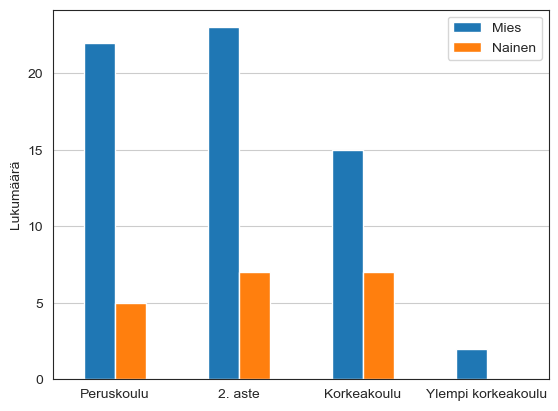

In [7]:
df1.plot(kind='bar', rot=0)    # Lukumäärät pylväinä

plt.ylabel('Lukumäärä')
plt.grid(axis='y')    # Vaakasuuntainen taustaviivoitus

Prosenttien esittämiseen sopii vierekkäisiä pylväitä paremmin pinotut pylväät. Kaaviota varten taulukon rivit ja sarakkeet kannattaa vaihtaa päittäin käyttämällä transponointi  toimintoa **T**.

Pinottuun pylväskaavioon sopii oletusvärikarttaa paremmin jokin sequential-tyyppinen värikartta. Tässä käytän 'Blues'-värikarttaa. Värikarttoja: https://matplotlib.org/stable/tutorials/colors/colormaps.html 

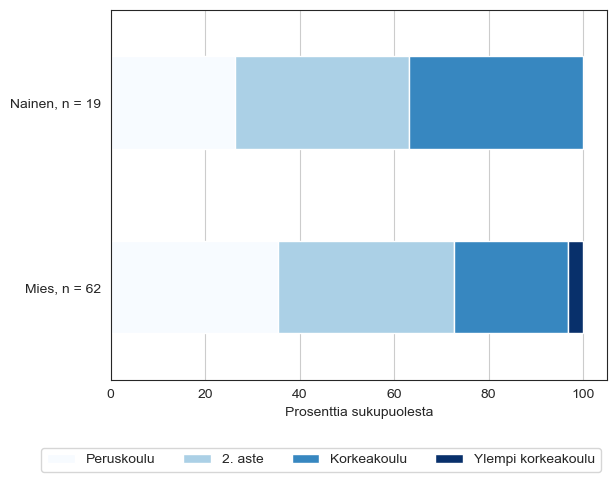

In [8]:
df3.T.plot(kind='barh', stacked=True, cmap='Blues')

plt.xlabel('Prosenttia sukupuolesta')
plt.grid(axis='x')

# Selitteen sijoittelu suhteessa origoon, selitteitä 4 vierekkäin
plt.legend(loc=(-0.14, -0.25), ncol=4)

## Onko ristiintaulukoinnissa havaittu riippuvuus tilastollisesti merkitsevää?

Otoksessa havaitut riippuvuudet voivat olla liian pieniä, jotta niitä voisi yleistää laajempaan perusjoukkoon, josta otos on otettu. Kyseessä voi olla otantavirheen (sattuman) aiheuttama riippuvuus.

Riippuvuutta sanotaan merkitseväksi, jos sen perusteella voidaan tehdä yleistys laajempaan perusjoukkoon, josta otos on otettu. Riippuvuuden merkitsevyyttä voit testata laskemalla niin kutsuttu **p-arvo**. Mitä pienempi p-arvo, sitä merkitsevämpi riippuvuus. Yleensä alle 0,05 (5 %) suuruisia p-arvoja pidetään osoituksena merkitsevästä riippuvuudesta.

Ristiintaulukointiin liittyvän p-arvon voit laskea khiin neliö -testillä (chi2_contingency). Testin palauttamat arvot ovat khiin neliö, p-arvo ja vapausasteiden määrä (df eli degrees of freedom). 

Lisäksi testi palauttaa teoreettisen ristiintaulukoinnin, jossa ei ole riippuvuutta lainkaan, mutta rivi- ja sarakesummat ovat samat kuin alkuperäisessä ristiintaulukoinnissa. Teoreettisen ristiintaulukoinnin avulla voit arvioida testin pätevyyttä. Mitä enemmän teoreettisessa taulukossa on pieniä, alle viiden suuruisia frekvenssejä sitä varovaisemmin testin tulokseen pitää suhtautua. Esimerkin tapauksessa on kaksi alle viiden suuruista frekvenssiä, joten testiä ei voi pitää pätevänä.


In [9]:
from scipy.stats import chi2_contingency

# khiin neliö -testi lasketaan aina lukumäärätaulukosta!
chi2_contingency(df1)

Chi2ContingencyResult(statistic=1.836533415650563, pvalue=0.6070173075042058, dof=3, expected_freq=array([[20.66666667,  6.33333333],
       [22.96296296,  7.03703704],
       [16.83950617,  5.16049383],
       [ 1.5308642 ,  0.4691358 ]]))

Khiin neliö -testin tulos: Riippuvuus ei ole merkitsevää (khiin neliö = 1.84, p = 0.607, df = 3).

Seuraavassa vähän pelkistetympi p-arvon tulostus:

In [10]:
p = chi2_contingency(df1)[1]
print(f'p-arvo {p:.3f}')

p-arvo 0.607


## Lisätietoa

* Tietoa khiin neliö -testistä:
https://tilastoapu.wordpress.com/2011/10/14/6-ristiintaulukointi-ja-khiin-nelio-testi/

* Lisätietoa p-arvoista:
https://tilastoapu.wordpress.com/2012/02/14/p-arvo/

* p-arvoja Pythonilla eri testaustilanteisiin:
https://nbviewer.jupyter.org/github/taanila/tilastoapu/blob/master/p.ipynb

Data-analytiikka Pythonilla https://tilastoapu.wordpress.com/python/